# Análisis de Series Temporales
## Laboratorio 1

Estudiante: Ing. Luis Epifanio (luis.epifanio@gmail.com)

# 1. Consigna
1) Consigna

2) Levantar los datos desde el archivo dataset/demanda.csv. Los mismos fueron extraídos de http://portalweb.cammesa.com/memnet1/Pages/descargas.aspx 

>
> Ver apartado [2.1. Carga y Limpieza de Datos](#2.1.-Carga-y-Limpieza-de-Datos)
>

3) Explorar los datos y visualizar descomposición de datos
>
> Ver apartado [3.1. Explorar los datos y visualizar descomposición de datos](#3.1-Explorar-los-datos-y-visualizar-descomposición-de-datos.)
>


4) Modelar con Holt Winters Smoothing con diferentes parámetros
>
> Ver apartado [4.1. Holt Winters con Suavizado Exponencial](#4.1-Holt-winters-exponential-smoothing)
>

5) Visualizar los resultados y evaluar su poder predictivo, comparando ambos modelos


# 2. Desarrollo

In [1]:
# Packages
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
# Plot settings
sns.palplot(sns.color_palette("husl"))
sns.set_context('notebook') 
sns.set_style('ticks')
sns.set()
red='#D62728'
blue='#1F77B4'
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.style.use('ggplot')

## 2.1. Carga y Limpieza de Datos

Correspondiente al punto 1: 
> Levantar los datos desde el archivo dataset/demanda.csv. Los mismos fueron extraídos de 
> http://portalweb.cammesa.com/memnet1/Pages/descargas.aspx

In [4]:
data = pd.read_csv('datasets/demanda.csv', index_col='TIPO', parse_dates=True, dayfirst=True, thousands='.')
data.index.names = ['periodo']
data.rename(
    columns={
    'Residencial'                 : 'residencial' , 
    'Comercial'                   : 'comercial'   ,
    'Industrial/Comercial Grande' : 'industrial'  ,
    'TOTAL'                       : 'total'
    }, inplace=True)

#data.index = data.index.to_period(freq='M')

display(data.index)
data.tail(5)

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01'],
              dtype='datetime64[ns]', name='periodo', freq=None)

,residencial,comercial,industrial,total
periodo,,,,
2018-04-01,4084110,3131427,3277777,10493315
2018-05-01,4276830,3101854,3286778,10665462
2018-06-01,5569775,3231036,3123287,11924098
2018-07-01,6167114,3326186,3112541,12605842
2018-08-01,5359054,3237765,3112882,11709701


In [5]:
data.describe().round(2)

,residencial,comercial,industrial,total
count,44.00,44.00,44.00,44.00
mean,4745018.02,3193531.25,3201238.93,11139788.20
std,627095.26,193716.15,107030.91,764343.47
min,3754330.00,2900824.00,2950818.00,9793759.00
25%,4222957.00,3038991.25,3122472.25,10466094.50
50%,4715575.50,3151394.50,3215652.00,11126247.50
75%,5201443.25,3312377.75,3266523.25,11800556.25
max,6167114.00,3670275.00,3460880.00,12605842.00


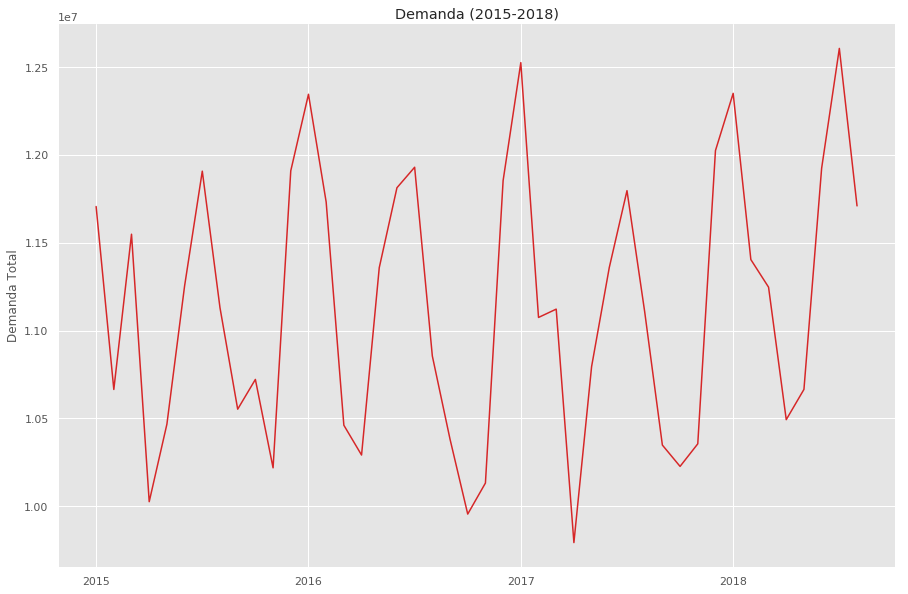

In [6]:
def extractSerieOnColumn(dataframe, columnName):
    y = dataframe[columnName].copy()
    # y.index = y.index.to_period(freq='M')
    return ( y, dataframe[columnName])

def plotSerie( y, yLabel ):
    fig, ax= plt.subplots( )
    y.plot(color=red)
    ax.set_xlabel('')
    ax.set_ylabel(yLabel)
    ax.set_title('Demanda (2015-2018)')
    ax.set_xticks([], minor=True)
    sns.despine()
    plt.show()

y,timeserie = extractSerieOnColumn(data,'total')
plotSerie(y, 'Demanda Total')

# 3. Descomposición de series temporales

## 3.1 Explorar los datos y visualizar descomposición de datos.

In [7]:
decomposition = sm.tsa.x13_arima_analysis(timeserie,x12path='.')

In [8]:
dir(decomposition)[-7:]

['irregular', 'observed', 'plot', 'results', 'seasadj', 'stdout', 'trend']

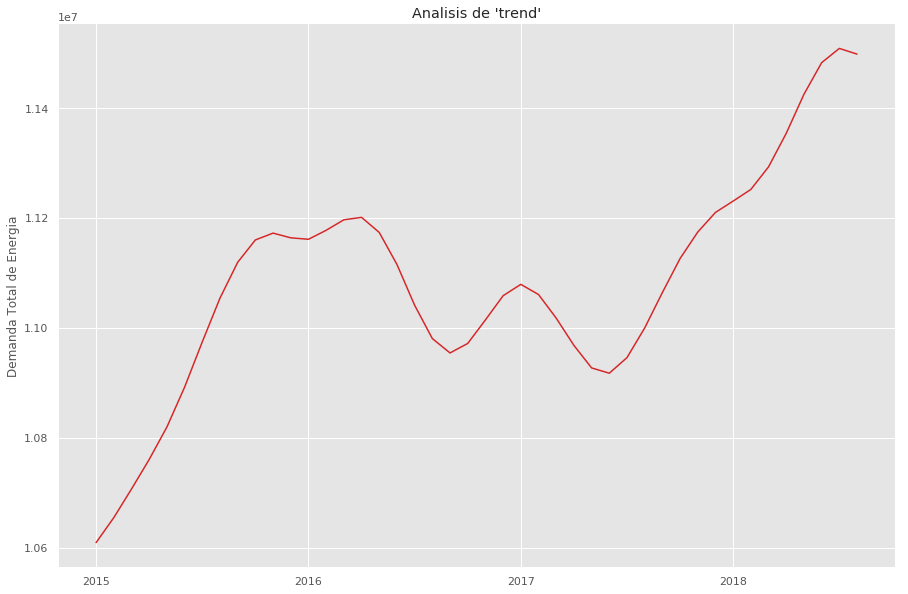

In [9]:
# play with trend, irregular,observed,seasadj

def plotComponent(decomposition, componentName,yLabel):
    fig, ax= plt.subplots( )
    getattr(decomposition, componentName).plot(color=red)
    ax.set_xlabel('')
    ax.set_ylabel(yLabel)
    ax.set_title('Analisis de \''+ componentName+'\'')
    ax.set_xticks([], minor=True) # I prefer to remove the minor ticks for a cleaner plot
    sns.despine()
    plt.show()
    
plotComponent(decomposition,'trend','Demanda Total de Energia')

In [10]:
from plotting import plot_components_x13
plot_components_x13(decomposition)
plt.show()

ModuleNotFoundError: No module named 'plotting'

In [ ]:
f=open('x13resultsForDemanda.txt', mode='w+')
f.write(decomposition.results)
f.close()

## Trend corrected exponential smoothing

In [ ]:
# play with trend, irregular,observed,seasadj
ts=decomposition.trend
ts.index=ts.index.to_period(freq='M')

In [ ]:
model_sm = sm.tsa.Holt(ts).fit()
smoothed_sm = model_sm.fittedvalues
alpha_sm = model_sm.model.params['smoothing_level']
betha_sm = model_sm.model.params['smoothing_slope']
mse_sm = sm.tools.eval_measures.mse(ts,smoothed_sm)
print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_sm))
print(' Smoothing parameter: betha  {0:.3f}'.format(betha_sm))
print(' In-sample fit:')
print(' MSE               {0:.3f}'.format(mse_sm))

In [ ]:
fig, ax= plt.subplots( )

ts['2015':].plot(color='#D62728', label='Seasonally adjusted retail turnover')
smoothed_sm['2015':].plot(color='black', label='Smoothed', alpha=0.65)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

In [ ]:
h=24
w=h*3
data = ts
model = sm.tsa.Holt
pred_index = data.index[-1] + np.array(range(1,h+1))
pred_rolling = pd.Series(0,index=pred_index)
pred_expanding = pd.Series(0,index=pred_index)
orig_fit = None
for i in range(0,h):
    current = pd.concat([data, pred_expanding.head(i)])
    expanding = model(current).fit()
    if i==0:
        orig_fit = expanding.fittedvalues
    rolling = model(current.tail(w)).fit()
    pred_expanding.update(expanding.forecast(1))
    pred_rolling.update(rolling.forecast(1))
ax = data[-w:].plot(color='red'            )
pd.concat([orig_fit[-w:],pred_expanding]).plot(ax=ax,color='blue');
pd.concat([orig_fit[-w:],pred_rolling]).plot(ax=ax,color='green');

# 4. Modelos Holt Winters Smoothing

## 4.1 Holt-winters exponential smoothing

In [ ]:
def hw_summary(model_sm):
    alpha_sm = model_sm.model.params['smoothing_level']
    betha_sm = model_sm.model.params['smoothing_slope']
    delta_sm = model_sm.model.params['smoothing_seasonal']
    mse_sm = sm.tools.eval_measures.mse(model_sm.data.endog,model_sm.fittedvalues)
    rmse_sm = sm.tools.eval_measures.rmse(model_sm.data.endog,model_sm.fittedvalues)
    print(' Smoothing parameter: alpha  {0:.3f}'.format(alpha_sm))
    print(' Smoothing parameter: betha  {0:.3f}'.format(betha_sm))
    print(' Smoothing parameter: delta  {0:.3f}'.format(delta_sm))
    print(' In-sample fit:')
    print(' MSE               {0:.3f}'.format(mse_sm))
    print(' RMSE               {0:.3f}'.format(rmse_sm))
    return rmse_sm

A continuacion probaoms con modelos additivos y multiplicativos

In [ ]:
ahw_sm=sm.tsa.ExponentialSmoothing(
    y, 
    trend='add', 
    damped=False,
    seasonal='add', 
    seasonal_periods=12
).fit()

hw_summary(ahw_sm);

In [ ]:
mhw_sm=sm.tsa.ExponentialSmoothing(
    y, 
    trend='add', 
    damped=False, 
    seasonal='mul', 
    seasonal_periods=12
).fit()
hw_summary(mhw_sm);

# 5 Visualización y Evaluación

## 5.1.Visualizar los resultados y evaluar su poder predictivo

In [ ]:
smoothed_mul=pd.Series(mhw_sm.fittedvalues, index=y.index)
smoothed_add=pd.Series(ahw_sm.fittedvalues, index=y.index)

fig, ax= plt.subplots()

linestyles = ['_', '-', '--', ':']
linestyle='None'

y['2015':].plot(color='#D62728', label='Demanda Total de Energia')
smoothed_mul['2015':].plot(color='green', linestyle='--', label='Multiplicative', alpha=0.9)
smoothed_add['2015':].plot(color='blue', linestyle=':', label='Additive', alpha=0.9)
plt.legend(loc='best')
ax.set_xlabel('')
ax.set_xticks([], minor=True)
ax.set_title(r'Holt-winters exponential smoothing', fontsize=13.5, fontweight='bold')
sns.despine()
plt.show()

### Analisis de modelo y residuos

In [ ]:
resid_mul = (y-mhw_sm.fittedvalues)[12:] # we remove the first 12 observations as they are for initialisitation only
resid_add = (y-ahw_sm.fittedvalues)[12:]

fig, ax= plt.subplots( )
resid_mul.plot(color='green', linestyle='--', label='Multiplicative', alpha=0.9)
resid_add.plot(color='blue', linestyle=':', label='Additive', alpha=0.9)
ax.set_xlabel('')
ax.set_xticks([], minor=True) 
ax.set_title('Residual plot')
sns.despine()
plt.show()

In [ ]:
def plot_residues(resid):
    fig, ax = plt.subplots()
    lags = len(resid) - 1
    sm.graphics.tsa.plot_acf(resid, lags=lags, ax=ax)
    sns.despine()
    plt.show()


### Distribución de residuos para modelo additivo

In [ ]:
plot_residues(resid_add)


In [ ]:
### Distribución de residuos para modelo multiplicativo

In [ ]:
plot_residues(resid_mul)


In [ ]:
from plotting import histogram

histogram(resid_add)
histogram(resid_mul)

plt.show()

## Model validation

In [ ]:
start_val = y.index[-round(len(y)/12*.2)*12]
start_val

In [ ]:
# Real time forecasting 

validation=y[start_val:].index
start = y.index.get_loc(start_val) 

pred1 = [] # seasonal random walk
pred2 = [] # additive holt winters
pred3 = [] # multiplicative holt winters
actual= []

for i in range(start, len(y)):
    
    actual.append(y.iloc[i]) # actual value
    
    pred1.append(y.iloc[i-12]) # seasonal random walk forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='add', seasonal_periods=12).fit()
    pred2.append(model.forecast(1)[0]) # additive holt winters forecast
    
    model = sm.tsa.ExponentialSmoothing(y.iloc[:i], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit()
    pred3.append(model.forecast(1)[0]) # multiplicate holt winters forecast
    

columns=['Seasonal RW', 'Additive', 'Multiplicative', 'Actual']
results = np.vstack([pred1,pred2,pred3,actual]).T
results = pd.DataFrame(results, columns=columns, index=validation)

In [ ]:
from scipy import stats

table = pd.DataFrame(0.0, index=results.columns[:-1], columns=['RMSE','SE'])
for i in range(len(results.columns)-1):
    table.iloc[i,0] = sm.tools.eval_measures.rmse(results.iloc[:,i], results.iloc[:,-1])
    table.iloc[i,1] = (results.iloc[:,i] - results.iloc[:,-1]).sem()
table.round(3)

Un breve analisis comparativo demuestra que ambos modelos son similares, sin embargo elegiremos la variante multiplicativa debido a su menor RMSE, demostrando se mejor que alguno modelo más simple y de referencia

# 6. Forecast

In [ ]:
h=24

model_add = sm.tsa.ExponentialSmoothing(
            y, 
            trend='add', 
            damped=False, 
            seasonal='add', 
            seasonal_periods=12
        ).fit()
model_mul = sm.tsa.ExponentialSmoothing(
            y, 
            trend='add', 
            damped=False, 
            seasonal='mul', 
            seasonal_periods=12
        ).fit()

forecast_add = model_add.forecast(h)
forecast_mul = model_mul.forecast(h)

plot = pd.DataFrame()
plot['model_add'] = pd.concat([model_add.fittedvalues, forecast_add])
plot['model_mul'] = pd.concat([model_mul.fittedvalues, forecast_mul])
plot['data'] = y
#pd.Series(model.fittedvalues + model.fcastvalues), 
#                         index=pd.period_range(y.index[0],y.index[-1]+h,freq=y.index.freq))

plot['2010':].plot();